### Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.

Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [2]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot as plt


In [3]:
df = pd.read_csv("uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

## Pre-processing the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [7]:
dateTime_df = pd.DataFrame(df['pickup_datetime'])

In [8]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['pickup_datetime']

0        2015-05-07 19:52:06+00:00
1        2009-07-17 20:04:56+00:00
2        2009-08-24 21:45:00+00:00
3        2009-06-26 08:22:21+00:00
4        2014-08-28 17:47:00+00:00
                    ...           
199995   2012-10-28 10:49:00+00:00
199996   2014-03-14 01:09:00+00:00
199997   2009-06-29 00:42:00+00:00
199998   2015-05-20 14:56:25+00:00
199999   2010-05-15 04:08:00+00:00
Name: pickup_datetime, Length: 200000, dtype: datetime64[ns, UTC]

In [9]:
df_num = df.drop(columns=['Unnamed: 0','key','pickup_datetime'],axis=1)      #removing non numerical data from given dataset

In [10]:
df_num.isnull().sum()      

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
df_num.dropna(inplace=True)

In [12]:
df_num.isnull().sum()      

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

### Identifying outliers

<Axes: xlabel='fare_amount'>

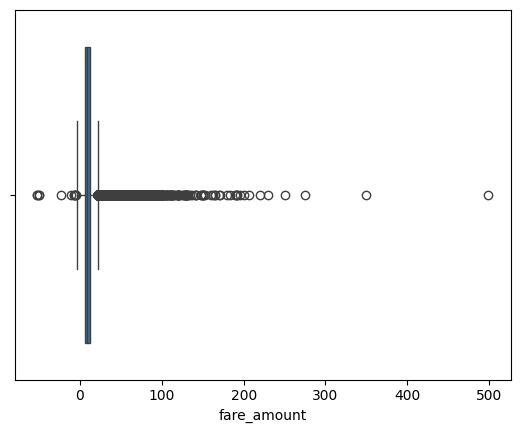

In [13]:
import seaborn as sns

sns.boxplot(x=df_num['fare_amount'])

In [14]:
quant1 = df_num['fare_amount'].quantile(0.25)
print("Value of Quantile 0.25 is: ",quant1)
quant3 = df_num['fare_amount'].quantile(0.75)
print("Value of Quantile 0.75 is: ",quant3)

IQR = quant3 - quant1      #Calculate IQR


Value of Quantile 0.25 is:  6.0
Value of Quantile 0.75 is:  12.5


In [15]:
#Define Threshold value
threshold = 1.5
lower_bound = quant1 - (threshold * IQR)
upper_bound = quant3 + (threshold * IQR)

print("Value of Lower Bound is: ", lower_bound)
print("Value of Upper Bound is: ", upper_bound)

Value of Lower Bound is:  -3.75
Value of Upper Bound is:  22.25


In [16]:
#Now remove outliers
df_no_outliers = df_num[(df_num['fare_amount'] >= lower_bound) & (df_num['fare_amount'] <= upper_bound)]

<Axes: xlabel='fare_amount'>

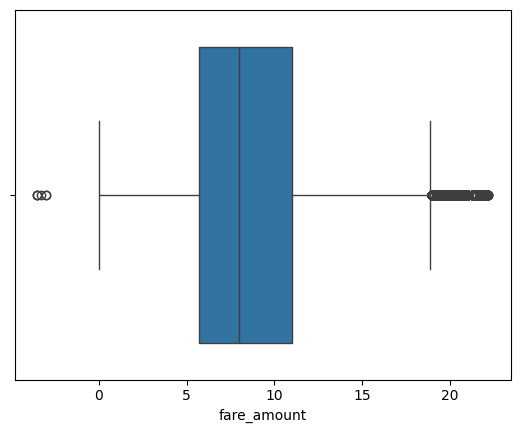

In [17]:
sns.boxplot(x=df_no_outliers['fare_amount'])

### Checking the correlation

In [18]:
corr_matrix = df_num.corr()
corr_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
fare_amount,1.000000,0.010458,-0.008482,0.008986,-0.011014,0.010158
pickup_longitude,0.010458,1.000000,-0.816461,0.833026,-0.846324,-0.000415
pickup_latitude,-0.008482,-0.816461,1.000000,-0.774787,0.702367,-0.001559
dropoff_longitude,0.008986,0.833026,-0.774787,1.000000,-0.917010,0.000033
dropoff_latitude,-0.011014,-0.846324,0.702367,-0.917010,1.000000,-0.000659
passenger_count,0.010158,-0.000415,-0.001559,0.000033,-0.000659,1.000000


### Implementing linear regression and random forest regression models

In [19]:
X = df_num[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']]
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.999817,40.738354,-73.999512,40.723217,1
1,-73.994355,40.728225,-73.994710,40.750325,1
2,-74.005043,40.740770,-73.962565,40.772647,1
3,-73.976124,40.790844,-73.965316,40.803349,3
4,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297,1
199996,-73.984722,40.736837,-74.006672,40.739620,1
199997,-73.986017,40.756487,-73.858957,40.692588,2
199998,-73.997124,40.725452,-73.983215,40.695415,1


In [20]:
y = df_num['fare_amount']
y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 199999, dtype: float64

In [21]:
from sklearn.preprocessing import MinMaxScaler     #For scaling of data

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(X)
scaler.data_max_
scaler.data_min_

array([-1340.64841 ,   -74.015515, -3356.6663  ,  -881.985513,
           0.      ])

In [24]:
x_scale = scaler.fit_transform(X)
x_scale

array([[0.90600001, 0.06677805, 0.72782548, 0.5258549 , 0.00480769],
       [0.90600392, 0.06677215, 0.72782654, 0.52587035, 0.00480769],
       [0.90599627, 0.06677945, 0.72783367, 0.52588307, 0.00480769],
       ...,
       [0.90600988, 0.0667886 , 0.72785664, 0.52583745, 0.00961538],
       [0.90600193, 0.06677054, 0.72782909, 0.52583906, 0.00480769],
       [0.90601104, 0.06676741, 0.72782858, 0.52588088, 0.00480769]])

In [25]:
x_df = pd.DataFrame(x_scale)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size=0.30,random_state=54)

In [28]:
x_train

array([[0.90602953, 0.06680141, 0.72782896, 0.52588203, 0.00480769],
       [0.9060153 , 0.06680422, 0.72783136, 0.52589355, 0.00480769],
       [0.90600837, 0.06676812, 0.72783164, 0.52587631, 0.02884615],
       ...,
       [0.90600841, 0.06679931, 0.72782923, 0.52586425, 0.02403846],
       [0.90599257, 0.06676661, 0.72783066, 0.52587098, 0.00480769],
       [0.90615954, 0.06672386, 0.72782951, 0.52587351, 0.00480769]])

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x_df,y,test_size=0.30,random_state=54)

In [30]:
x_train

,0,1,2,3,4
195309,0.906030,0.066801,0.727829,0.525882,0.004808
9999,0.906015,0.066804,0.727831,0.525894,0.004808
162183,0.906008,0.066768,0.727832,0.525876,0.028846
106578,0.906000,0.066783,0.727830,0.525867,0.028846
183945,0.905996,0.066767,0.727826,0.525876,0.004808
...,...,...,...,...,...
5143,0.906020,0.066803,0.727836,0.525880,0.004808
61199,0.906017,0.066789,0.727829,0.525881,0.028846
82818,0.906008,0.066799,0.727829,0.525864,0.024038
105797,0.905993,0.066767,0.727831,0.525871,0.004808


In [31]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


In [32]:
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred = lr.predict(x_test)
y_pred

array([11.35729146, 11.60418776, 11.2756401 , ..., 11.27627848,
       11.27253292, 11.68548577])

In [34]:
lr.coef_

array([ 10.63214818,  -6.01129312, -49.92267337, -47.82129047,
        17.06594653])

In [35]:
lr.intercept_

63.44501575990227

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [37]:
mean_absolute_error(y_test,y_pred)

6.060470871798725

In [38]:
mean_squared_error(y_test,y_pred)

99.87440622582332

In [39]:
r2_score(y_test,y_pred)

-0.00021163687798742004

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf = RandomForestRegressor()

In [42]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [43]:
rf_y_pred = rf.predict(x_test)
rf_y_pred

array([ 8.81570026,  7.96421718,  9.01488088, ...,  9.01488088,
       21.915     , 10.868     ])

In [44]:
mean_absolute_error(y_test,y_pred)

6.060470871798725

In [45]:
mean_squared_error(y_test,y_pred)

99.87440622582332

In [46]:
r2_score(y_test,y_pred)

-0.00021163687798742004